<h1> Dora the explorer

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [3]:
%autoreload
import sys
from pipeline import Pipeline as Pipin
pipe = Pipin()
%load_ext autoreload

Current working directory: /Users/matsalexander/Desktop/Forest Gump/mats
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# all_data = pipe.get_combined_datasets(offset_years=True)
all_data = pipe.get_combined_data()
df0 = all_data


Se på features

In [5]:
snow_features = [c  for c in all_data.columns if 'snow' in c]
snow_features
all_data[snow_features].describe()

fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count       92951.000000      92951.000000       92951.000000   
mean            0.117096          0.009727           0.231608   
std             0.779764          0.104943           1.223007   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max            37.474998          7.250000          37.474998   

       fresh_snow_3h:cm  fresh_snow_6h:cm  snow_density:kgm3  snow_depth:cm  \
count      92951.000000      92951.000000             4213.0   92951.000000   
mean           0.029244          0.058533              250.0       0.193164   
std            0.275208          0.477040                0.0       1.253925   
min            0.000000          0.000000              250.0       0.000000   
25%            0.000000          0.000000              250.0       0.000000   
50%            0.000000          0.000000              250.0       0.000000   
75%            0.000000          0.000000              250.0       0.000000   
max           20.325001         33.375000              250.0      18.200001   

       snow_drift:idx  snow_melt_10min:mm  snow_water:kgm2  
count    92951.000000        92951.000000     92951.000000  
mean         0.000022            0.000273         0.090299  
std          0.004181            0.004249         0.237841  
min          0.000000            0.000000         0.000000  
25%          0.000000            0.000000         0.000000  
50%          0.000000            0.000000         0.000000  
75%          0.000000            0.000000         0.100000  
max          1.000000            0.180000         5.650000

In [6]:
for sne_feat in snow_features:
    sne_sum = all_data[sne_feat].sum()
    print(f'{sne_feat} : {sne_sum} ')

fresh_snow_12h:cm : 10884.2001953125 
fresh_snow_1h:cm : 904.1250610351562 
fresh_snow_24h:cm : 21528.17578125 
fresh_snow_3h:cm : 2718.25 
fresh_snow_6h:cm : 5440.69970703125 
snow_density:kgm3 : 1053250.0 
snow_depth:cm : 17954.826171875 
snow_drift:idx : 2.0 
snow_melt_10min:mm : 25.399999618530273 
snow_water:kgm2 : 8393.375 


In [16]:
sum_snow_drift = all_data['snow_drift:idx'].unique()
print(sum_snow_drift)
print( all_data['snow_drift:idx'].sum())

[0.    nan 0.75 1.   0.25]
2.0


<h1>Se på tune funcksjonen. Hva gjør den? <h1>

In [8]:
df1_0 = pipe.get_data("A")
df2_0 = pipe.get_data("B")
df3_0 = pipe.get_data("C") 

In [9]:
train1, tune1 = pipe.split_train_tune(df1_0 )
train2, tune2 = pipe.split_train_tune(df2_0 )
train3, tune3 = pipe.split_train_tune(df3_0 )  

In [10]:
df1_0.describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count              34061.000000         34061.000000          27934.000000   
mean                   6.322320             1.253280           2974.149414   
std                    2.799442             0.037206           2564.641846   
min                    0.700000             1.145000             27.849998   
25%                    4.200000             1.227500           1126.050049   
50%                    5.800000             1.251500           1978.900024   
75%                    8.250000             1.277250           4174.150391   
max                   17.350000             1.426250          12294.901367   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           3.406100e+04     34061.000000      31698.000000   
mean            5.526711e+05       153.519684       1728.923462   
std             8.483389e+05       236.244736       1807.137817   
min             0.000000e+00         0.000000         27.799999   
25%             0.000000e+00         0.000000        582.918762   
50%             2.166182e+04         3.525000       1150.162476   
75%             8.924273e+05       251.925003       2084.781250   
max             2.988628e+06       835.099976      11673.625000   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
count      34061.00000    34061.000000   34061.000000      3.406100e+04   
mean           0.03777      275.971802      42.069969      1.514517e+05   
std            0.18258        6.892324      62.838524      2.235248e+05   
min            0.00000      251.074997       0.000000      0.000000e+00   
25%            0.00000      271.299988       0.000000      0.000000e+00   
50%            0.00000      276.000000       2.075000      1.651862e+04   
75%            0.00000      281.349976      70.699997      2.536671e+05   
max            1.00000      293.625000     332.274994      1.191085e+06   

       direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  elevation:m  \
count  34061.000000     3.406100e+04             34061.000000      34061.0   
mean      52.627697     1.894599e+05                67.701607          6.0   
std      115.250557     4.093454e+05                33.808254          0.0   
min        0.000000     0.000000e+00                 0.000000          6.0   
25%        0.000000     0.000000e+00                43.500000          6.0   
50%        0.000000     1.248000e+02                80.449997          6.0   
75%       34.250000     1.320907e+05                98.775002          6.0   
max      683.400024     2.441750e+06               100.000000          6.0   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count       34061.000000      34061.000000       34061.000000   
mean            0.088203          0.007403           0.173595   
std             0.594526          0.083636           0.928176   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max            15.000000          3.550000          15.000000   

       fresh_snow_3h:cm  fresh_snow_6h:cm    is_day:idx  is_in_shadow:idx  \
count      34061.000000      34061.000000  34061.000000      34061.000000   
mean           0.022289          0.044405      0.499185          0.535348   
std            0.214113          0.366713      0.486157          0.486656   
min            0.000000          0.000000      0.000000          0.000000   
25%            0.000000          0.000000      0.000000          0.000000   
50%            0.000000          0.000000      0.500000          1.000000   
75%            0.000000          0.000000      1.000000          1.000000   
max            7.875000         14.225000      1.000000          1.000000   

       msl_pressure:hPa  precip_5min:mm  

In [11]:

tune1.describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count               2197.000000          2197.000000           1694.000000   
mean                   4.116796             1.281070           3213.755615   
std                    1.319260             0.024972           2486.944092   
min                    1.100000             1.220750             27.924999   
25%                    3.200000             1.264500           1175.968750   
50%                    4.225000             1.280500           2653.800049   
75%                    5.000000             1.296000           4572.125000   
max                    7.600000             1.362500          12294.901367   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           2.197000e+03      2197.000000       1909.000000   
mean            4.409714e+05       122.473030       1637.790771   
std             6.646809e+05       185.306503       1836.614136   
min             0.000000e+00         0.000000         28.200001   
25%             0.000000e+00         0.000000        527.775024   
50%             9.454175e+03         0.950000        903.150024   
75%             7.225884e+05       202.225006       1932.900024   
max             2.540279e+06       709.825012      10674.099609   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
count      2197.000000     2197.000000    2197.000000      2.197000e+03   
mean          0.038917      270.453186      40.571609      1.460680e+05   
std           0.187007        4.745133      58.202454      2.065653e+05   
min           0.000000      255.250000       0.000000      0.000000e+00   
25%           0.000000      267.700012       0.000000      0.000000e+00   
50%           0.000000      271.424988       0.575000      1.431685e+04   
75%           0.000000      273.799988      75.074997      2.670561e+05   
max           1.000000      280.200012     294.100006      1.030832e+06   

       direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  elevation:m  \
count   2197.000000     2.197000e+03              2197.000000       2197.0   
mean      48.508091     1.746288e+05                68.099396          6.0   
std      106.050629     3.769525e+05                36.833477          0.0   
min        0.000000     0.000000e+00                 0.000000          6.0   
25%        0.000000     0.000000e+00                37.349998          6.0   
50%        0.000000     0.000000e+00                87.625000          6.0   
75%       30.325001     1.145617e+05                99.900002          6.0   
max      529.075012     1.873414e+06               100.000000          6.0   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count        2197.000000       2197.000000        2197.000000   
mean            0.390009          0.030291           0.779097   
std             1.172899          0.151295           1.935587   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.075000   
max             9.450000          2.200000          14.950000   

       fresh_snow_3h:cm  fresh_snow_6h:cm   is_day:idx  is_in_shadow:idx  \
count       2197.000000       2197.000000  2197.000000       2197.000000   
mean           0.094083          0.192126     0.475535          0.558603   
std            0.402777          0.696882     0.486438          0.483631   
min            0.000000          0.000000     0.000000          0.000000   
25%            0.000000          0.000000     0.000000          0.000000   
50%            0.000000          0.000000     0.250000          1.000000   
75%            0.000000          0.000000     1.000000          1.000000   
max            4.875000          7.400000     1.000000          1.000000   

       msl_pressure:hPa  precip_5min:mm  precip_ty

In [12]:
train1.describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count              31864.000000         31864.000000          26240.000000   
mean                   6.474390             1.251364           2958.680420   
std                    2.810473             0.037147           2568.855469   
min                    0.700000             1.145000             27.849998   
25%                    4.300000             1.226000           1122.637573   
50%                    6.075000             1.249000           1950.875000   
75%                    8.425000             1.275000           4136.362793   
max                   17.350000             1.426250          12285.650391   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           3.186400e+04     31864.000000      29789.000000   
mean            5.603728e+05       155.660339       1734.763550   
std             8.590304e+05       239.211639       1805.106812   
min             0.000000e+00         0.000000         27.799999   
25%             0.000000e+00         0.000000        588.650024   
50%             2.294212e+04         3.750000       1164.025024   
75%             9.037950e+05       257.500008       2088.524902   
max             2.988628e+06       835.099976      11673.625000   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
count     31864.000000    31864.000000   31864.000000      3.186400e+04   
mean          0.037691      276.352356      42.173279      1.518229e+05   
std           0.182274        6.854417      63.145176      2.246452e+05   
min           0.000000      251.074997       0.000000      0.000000e+00   
25%           0.000000      271.600006       0.000000      0.000000e+00   
50%           0.000000      276.600006       2.150000      1.662506e+04   
75%           0.000000      281.649994      70.525002      2.523888e+05   
max           1.000000      293.625000     332.274994      1.191085e+06   

       direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  elevation:m  \
count  31864.000000     3.186400e+04             31864.000000      31864.0   
mean      52.911743     1.904825e+05                67.674187          6.0   
std      115.854111     4.114707e+05                33.590080          0.0   
min        0.000000     0.000000e+00                 0.000000          6.0   
25%        0.000000     0.000000e+00                43.718749          6.0   
50%        0.000000     1.473375e+02                80.050003          6.0   
75%       34.656251     1.327916e+05                98.599998          6.0   
max      683.400024     2.441750e+06               100.000000          6.0   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count       31864.000000      31864.000000       31864.000000   
mean            0.067393          0.005825           0.131846   
std             0.525649          0.076557           0.797296   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max            15.000000          3.550000          15.000000   

       fresh_snow_3h:cm  fresh_snow_6h:cm    is_day:idx  is_in_shadow:idx  \
count      31864.000000      31864.000000  31864.000000      31864.000000   
mean           0.017339          0.034220      0.500816          0.533745   
std            0.193507          0.329654      0.486103          0.486830   
min            0.000000          0.000000      0.000000          0.000000   
25%            0.000000          0.000000      0.000000          0.000000   
50%            0.000000          0.000000      0.500000          1.000000   
75%            0.000000          0.000000      1.000000          1.000000   
max            7.875000         14.225000      1.000000          1.000000   

       msl_pressure:hPa  precip_5min:mm  

Hva gjør remove consec

In [13]:
# Test estimates
X_test_estimated_a = pd.read_parquet("../A/X_test_estimated.parquet")
X_test_estimated_b = pd.read_parquet("../B/X_test_estimated.parquet")
X_test_estimated_c = pd.read_parquet("../C/X_test_estimated.parquet")

# train Estimate
X_train_estimated_a = pd.read_parquet("../A/X_train_estimated.parquet")
X_train_estimated_b = pd.read_parquet("../B/X_train_estimated.parquet")
X_train_estimated_c = pd.read_parquet("../C/X_train_estimated.parquet")

# Observations
X_train_observed_a = pd.read_parquet("../A/X_train_observed.parquet")
X_train_observed_b = pd.read_parquet("../B/X_train_observed.parquet")
X_train_observed_c = pd.read_parquet("../C/X_train_observed.parquet")

# Targets
y_a = pd.read_parquet("../A/train_targets.parquet")
y_b = pd.read_parquet("../B/train_targets.parquet")
y_c = pd.read_parquet("../C/train_targets.parquet")

# X_test_estimated_b.describe()
X_train_estimated_c.head()

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2022-10-27 07:00:18 2022-10-28 22:00:00                       8.3   
1 2022-10-27 07:00:18 2022-10-28 22:15:00                       8.3   
2 2022-10-27 07:00:18 2022-10-28 22:30:00                       8.3   
3 2022-10-27 07:00:18 2022-10-28 22:45:00                       8.2   
4 2022-10-27 07:00:18 2022-10-28 23:00:00                       8.2   

   air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                1.231           1427.400024                    0.0   
1                1.231           2089.000000                    0.0   
2                1.231           2750.500000                    0.0   
3                1.230           3412.100098                    0.0   
4                1.230           4073.699951                    0.0   

   clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
0              0.0       1215.800049              1.0      281.200012   
1              0.0       1425.900024              1.0      281.200012   
2              0.0       1636.099976              1.0      281.100006   
3              0.0       1846.199951              1.0      281.100006   
4              0.0       2056.399902              1.0      281.100006   

   diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0            0.0               0.0           0.0              0.0   
1            0.0               0.0           0.0              0.0   
2            0.0               0.0           0.0              0.0   
3            0.0               0.0           0.0              0.0   
4            0.0               0.0           0.0              0.0   

   effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  fresh_snow_1h:cm  \
0                    100.0         24.0                0.0               0.0   
1                    100.0         24.0                0.0               0.0   
2                    100.0         24.0                0.0               0.0   
3                    100.0         24.0                0.0               0.0   
4                    100.0         24.0                0.0               0.0   

   fresh_snow_24h:cm  fresh_snow_3h:cm  fresh_snow_6h:cm  is_day:idx  \
0                0.0               0.0               0.0         0.0   
1                0.0               0.0               0.0         0.0   
2                0.0               0.0               0.0         0.0   
3                0.0               0.0               0.0         0.0   
4                0.0               0.0               0.0         0.0   

   is_in_shadow:idx  msl_pressure:hPa  precip_5min:mm  precip_type_5min:idx  \
0               1.0       1001.099976             0.0                   0.0   
1               1.0       1000.700012             0.0                   0.0   
2               1.0       1000.400024             0.0                   0.0   
3               1.0       1000.099976             0.0                   0.0   
4               1.0        999.700012             0.0                   0.0   

   pressure_100m:hPa  pressure_50m:hPa  prob_rime:p  rain_water:kgm2  \
0         986.000000        992.000000          0.0              0.0   
1         985.700012        991.700012          0.0              0.0   
2         985.400024        991.400024          0.0              0.1   
3         985.099976        991.099976          0.0              0.1   
4         984.700012        990.700012          0.0              0.1   

   relative_humidity_1000hPa:p  sfc_pressure:hPa  snow_density:kgm3  \
0                    93.900002        998.099976                NaN   
1                    93.599998        997.700012                NaN   
2                    93.300003        997.400024                NaN   
3                    93.000000        997.099976                NaN   
4                    92.699997        996.799988                NaN   

   snow_depth:cm  snow_drift:idx  snow_melt_10min:mm  s

In [14]:
feature_name = "pv_measurement"
all_data['time'] = pd.to_datetime(all_data['time'])
plt.figure(figsize=(20, 10))
plt.plot(all_data['time'], all_data[feature_name], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Energy Measurement')
plt.title('Energy Measurement Over Time')
plt.grid(True)
plt.show()


KeyError: 'time'

<h5> The sampling device seems to be broken in the interval below

(40, 53)


/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_69843/3032346376.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['time'] = pd.to_datetime(sub_data['time'])


Text(0.5, 0, 'Timestamp')

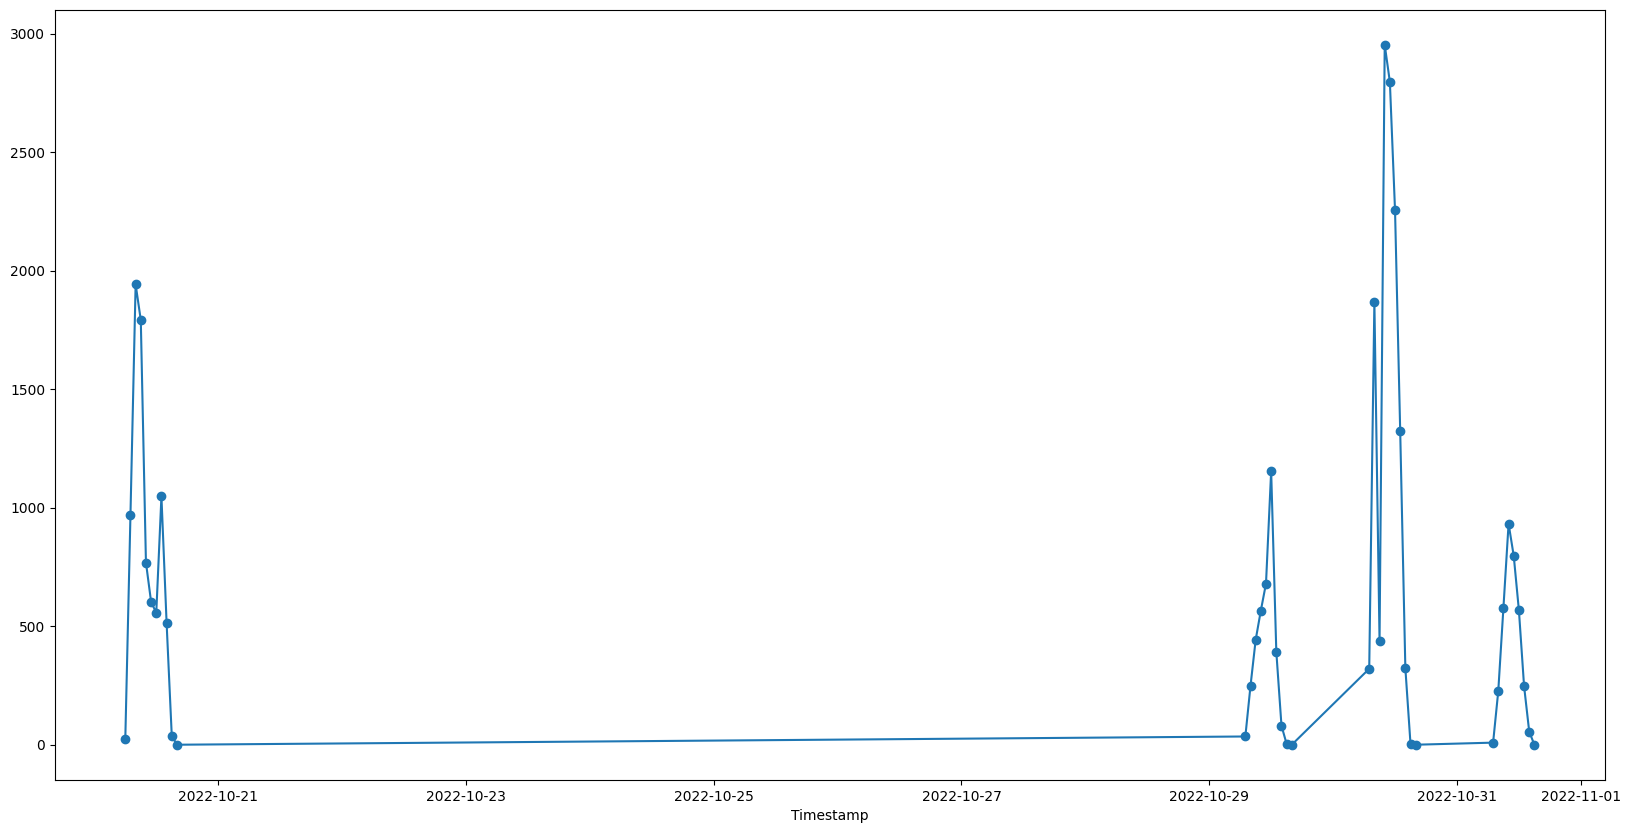

In [ ]:
# select the data frames from 2020-06 to 2020-09
feature_name = "pv_measurement"
start_date = '2022-10-20'
end_date = '2022-11-01'


mask = (all_data['time'] > start_date) & (all_data['time'] <= end_date)
sub_data = all_data.loc[mask]
sub_data['time'] = pd.to_datetime(sub_data['time'])
print(sub_data.shape)
plt.figure(figsize=(20, 10))
plt.plot(sub_data['time'], sub_data[feature_name], marker='o', linestyle='-')
plt.xlabel('Timestamp')
# sub_data[['time', "pv_measurement"]]


In [ ]:

# for index, row in enumerate(y_b_sub.values):
#     value = row[1]
#     last_10_values = y_b_sub.iloc[index-10:index, 1].values
#     # if np.all(last_10_values == value) and index > 10:
#     #     print(row[0], last_10_values) 
#     if value == 183.7125:
#         print(row[0], row[1])

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

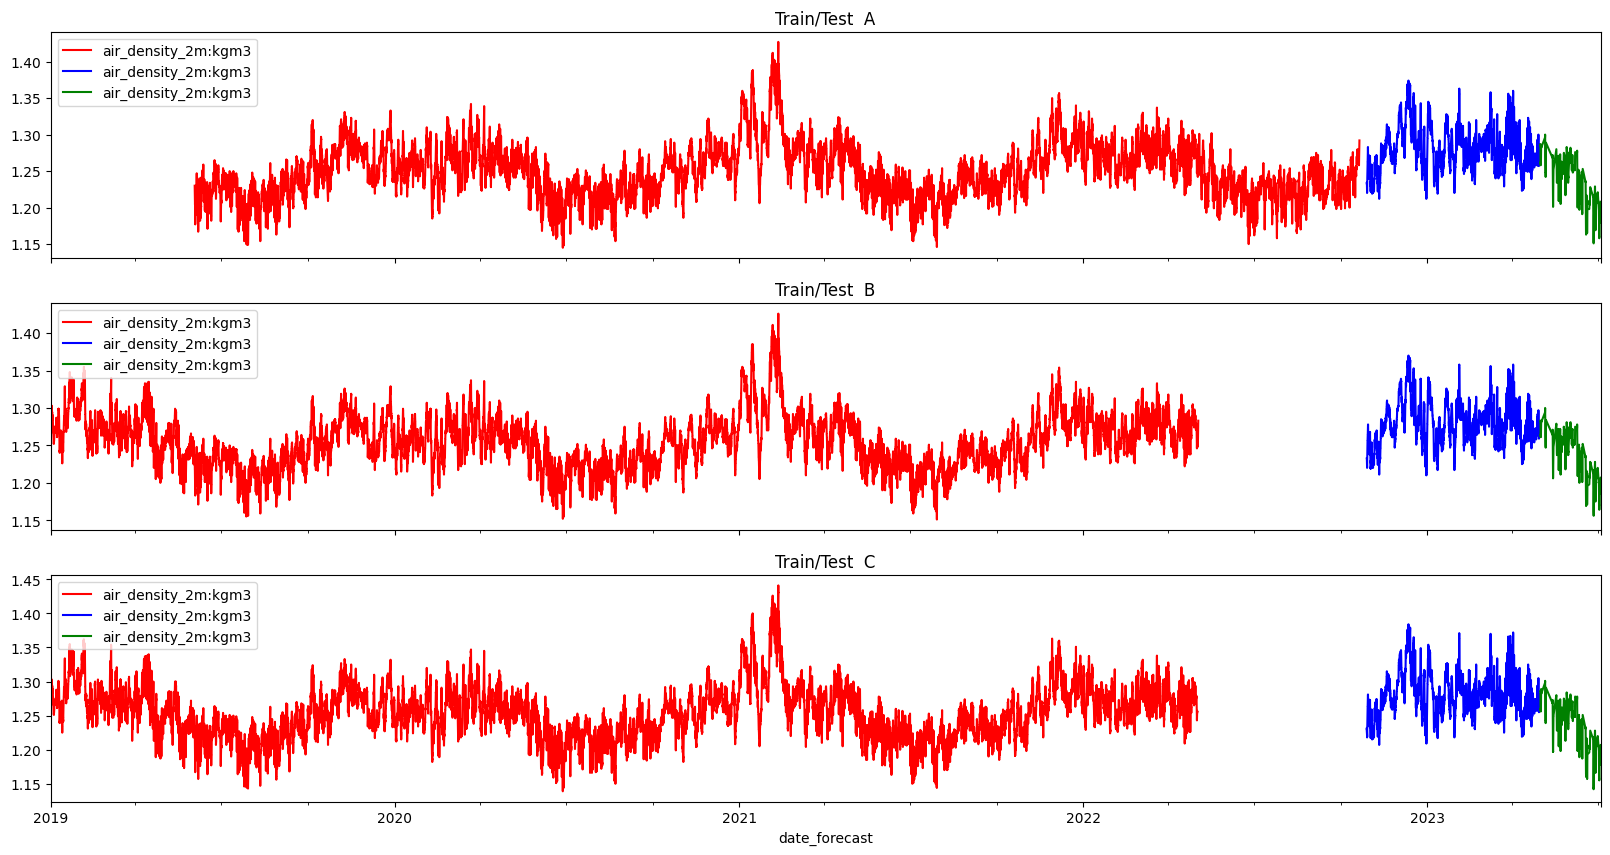

In [ ]:
feature_names = X_train_observed_a.columns
# X_train_observed_a["date_forecast"] = pd.to_datetime(X_train_observed_a["date_forecast"])
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = feature_names[2]
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


In [ ]:
feature_names

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

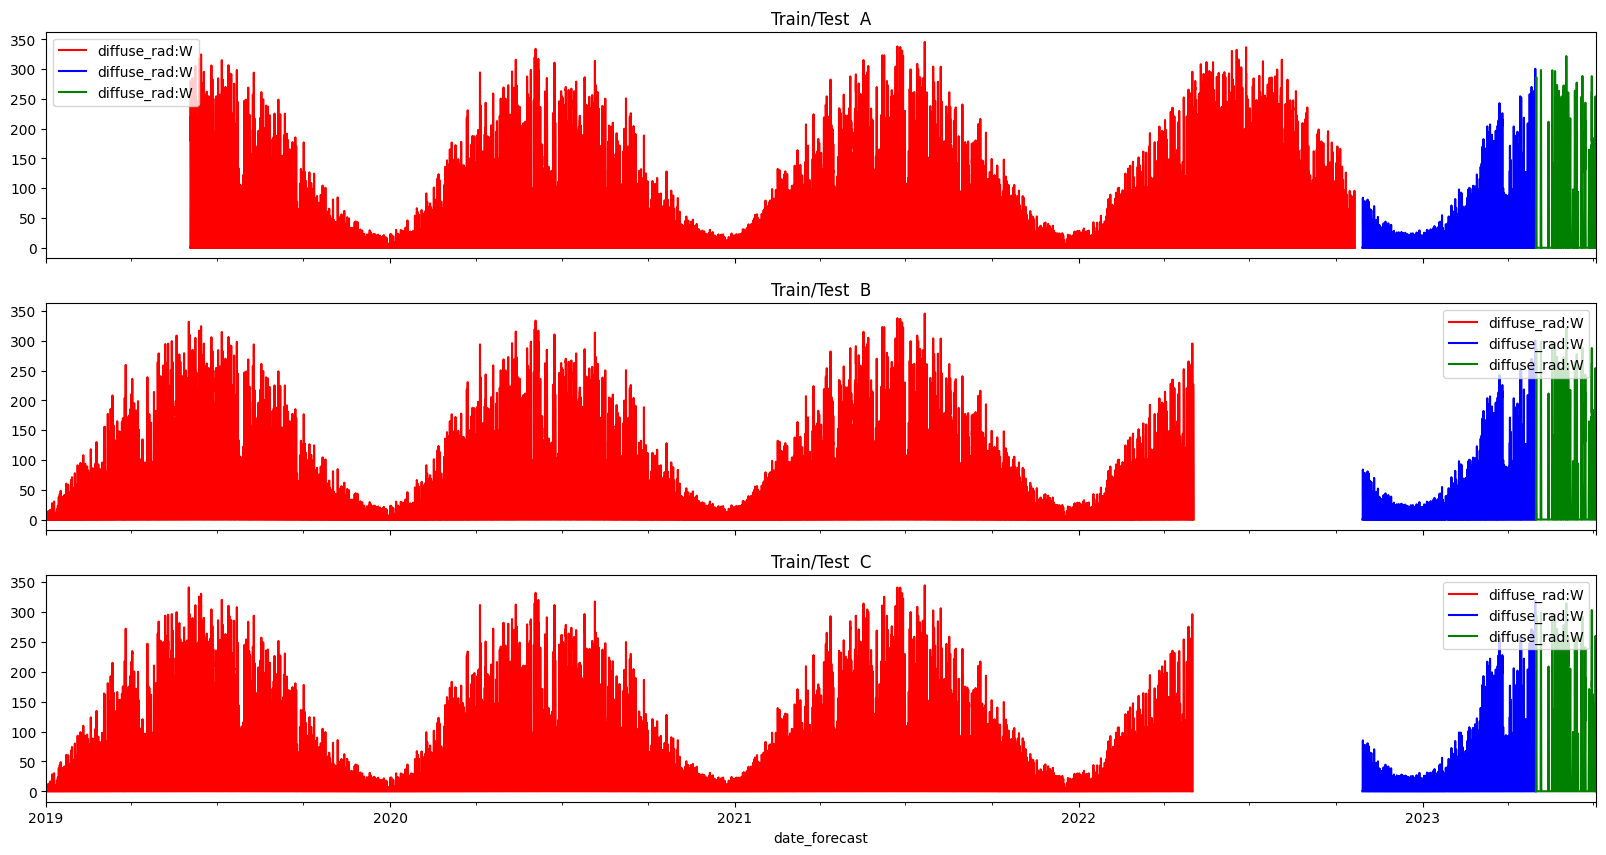

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = feature_names[2]
feature_name = "diffuse_rad:W"
# feature_name = "sun_azimuth:d"

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


In [ ]:
feature_names

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

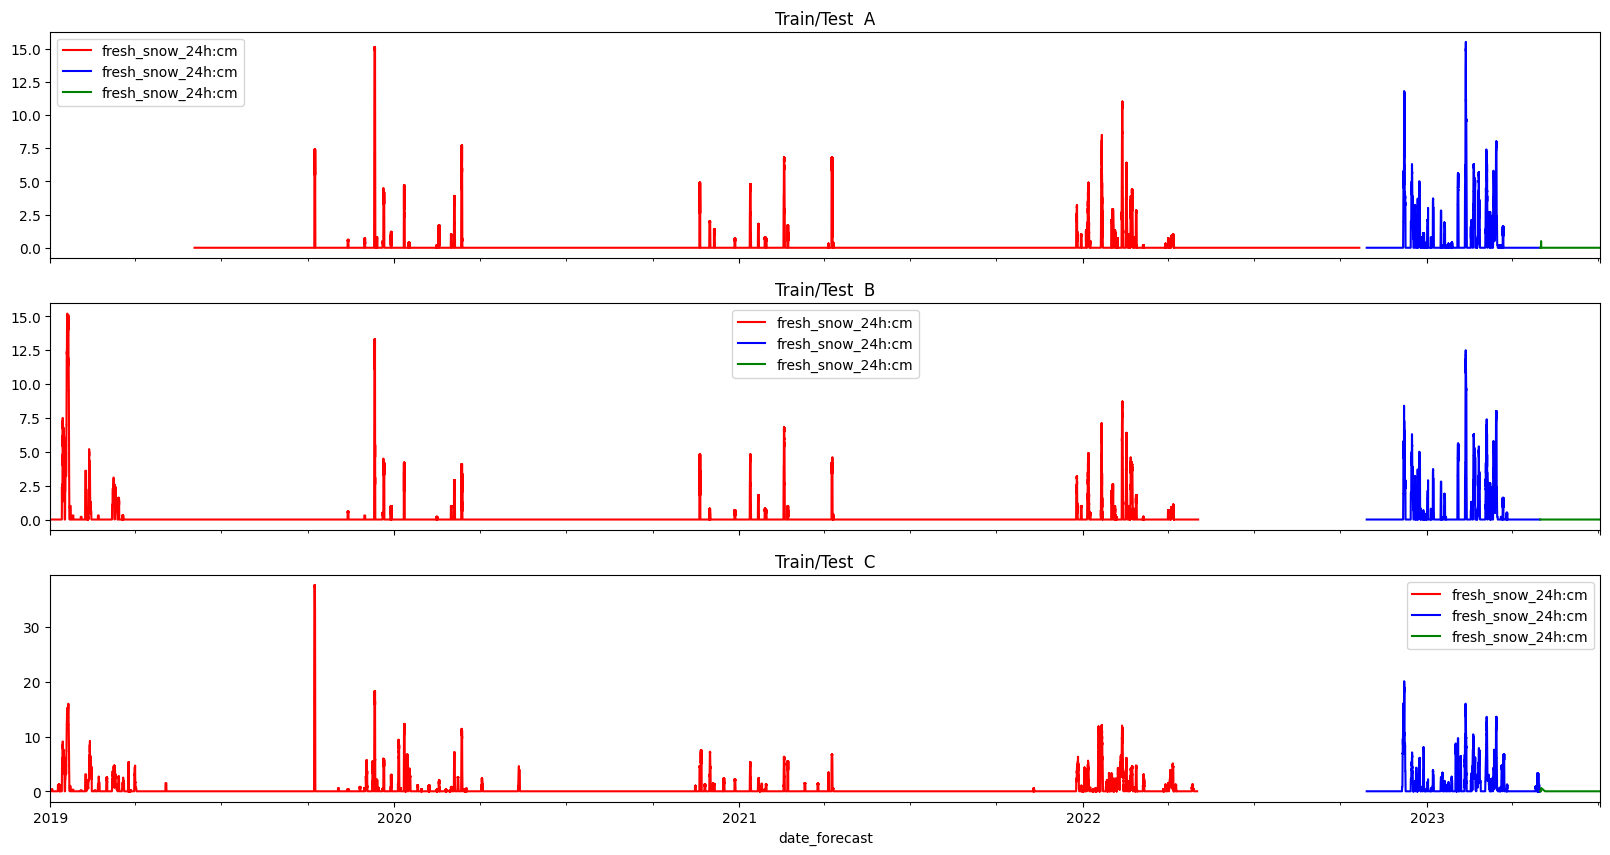

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = "sun_azimuth:d"
feature_name = "fresh_snow_24h:cm"

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')
